In [5]:
import os
import pickle
import numpy as np
from tqdm.notebook import tqdm

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

In [6]:
model = VGG16()
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
print(model.summary())

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None


In [7]:
features = {}
directory = "C:\\Users\\vedur\\OneDrive\\Desktop\\Projects\\Image Caption Generator\\Images"
for img_name in tqdm(os.listdir(directory)):
  img_path = directory + '/' + img_name
  image = load_img(img_path, target_size=(224, 224))
  image = img_to_array(image)
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  image = preprocess_input(image)
  feature = model.predict(image, verbose=0)
  image_id = img_name.split('.')[0]
  features[image_id] = feature

  0%|          | 0/8091 [00:00<?, ?it/s]

In [8]:
pickle.dump(features, open(os.path.join("C:\\Users\\vedur\\OneDrive\\Desktop\\Projects\\Image Caption Generator", "features.pkl"), "wb"))

In [9]:
with open(os.path.join("C:\\Users\\vedur\\OneDrive\\Desktop\\Projects\\Image Caption Generator", "features.pkl"), "rb") as f:
    features = pickle.load(f)

In [10]:
with open("C:\\Users\\vedur\\OneDrive\\Desktop\\Projects\\Image Caption Generator\\captions.txt", "r") as f:
    next(f)
    captions_doc = f.read()

In [11]:
mapping = {}
for line in tqdm(captions_doc.split('\n')):
  tokens = line.split()
  if len(line) < 2:
    continue
  img_id, caption = tokens[0], tokens[1:]
  img_id = img_id.split('.')[0]
  caption = ' '.join(caption)
  if img_id not in mapping:
    mapping[img_id] = []
  mapping[img_id].append(caption)

  0%|          | 0/40456 [00:00<?, ?it/s]

In [12]:
len(mapping)

8091

In [13]:
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            caption = captions[i]
            caption = caption.lower()
            caption = caption.replace('[^A-Za-z]', '')
            caption = caption.replace('\s+', ' ')
            caption = '<start> ' + " ".join([word for word in caption.split() if len(word)>1]) + ' <end>'
            captions[i] = caption

In [14]:
mapping['667626_18933d713e']

['girl is stretched out in shallow water',
 'girl wearing a red and multi-colored bikini is laying on her back in shallow water .',
 'little girl in a red swimsuit is laying on her back in shallow water .',
 'young girl is lying in the sand , while ocean water is surrounding her ."',
 'wearing a bikini lying on her back in a shallow pool of clear blue water .']

In [15]:
clean(mapping)

In [16]:
mapping['667626_18933d713e']

['<start> girl is stretched out in shallow water <end>',
 '<start> girl wearing red and multi-colored bikini is laying on her back in shallow water <end>',
 '<start> little girl in red swimsuit is laying on her back in shallow water <end>',
 '<start> young girl is lying in the sand while ocean water is surrounding her ." <end>',
 '<start> wearing bikini lying on her back in shallow pool of clear blue water <end>']

In [17]:
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [18]:
len(all_captions)

40455

In [19]:
all_captions[:10]

['<start> child in pink dress is climbing up set of stairs in an entry way <end>',
 '<start> girl going into wooden building <end>',
 '<start> little girl climbing into wooden playhouse <end>',
 '<start> little girl climbing the stairs to her playhouse <end>',
 '<start> little girl in pink dress going into wooden cabin <end>',
 '<start> black dog and spotted dog are fighting <end>',
 '<start> black dog and tri-colored dog playing with each other on the road <end>',
 '<start> black dog and white dog with brown spots are staring at each other in the street <end>',
 '<start> dogs of different breeds looking at each other on the road <end>',
 '<start> dogs on pavement moving toward each other <end>']

In [20]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [21]:
vocab_size

8402

In [22]:
max_length = max(len(caption.split()) for caption in all_captions)
max_length

34

In [23]:
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

In [24]:
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            for caption in captions:
                seq = tokenizer.texts_to_sequences([caption])[0]
                for i in range(1, len(seq)):
                    in_seq, out_seq = seq[:i], seq[i]
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    out_seq = to_categorical([out_seq], 	num_classes=vocab_size)[0]
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield {"image": X1, "text": X2}, y
                X1, X2, y = list(), list(), list()
                n = 0

In [25]:
inputs1 = Input(shape=(4096,), name="image")
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
inputs2 = Input(shape=(max_length,), name="text")
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [26]:
epochs = 15
batch_size = 64
steps = len(train) // batch_size

for i in range(epochs):
    generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

113/113 ━━━━━━━━━━━━━━━━━━━━ 335s 3s/step - loss: 6.2049
113/113 ━━━━━━━━━━━━━━━━━━━━ 343s 3s/step - loss: 4.4875
113/113 ━━━━━━━━━━━━━━━━━━━━ 344s 3s/step - loss: 3.8546
113/113 ━━━━━━━━━━━━━━━━━━━━ 341s 3s/step - loss: 3.5449
113/113 ━━━━━━━━━━━━━━━━━━━━ 344s 3s/step - loss: 3.3278
113/113 ━━━━━━━━━━━━━━━━━━━━ 392s 3s/step - loss: 3.1664
113/113 ━━━━━━━━━━━━━━━━━━━━ 512s 5s/step - loss: 3.0420
113/113 ━━━━━━━━━━━━━━━━━━━━ 456s 4s/step - loss: 2.9405
113/113 ━━━━━━━━━━━━━━━━━━━━ 611s 5s/step - loss: 2.8486
113/113 ━━━━━━━━━━━━━━━━━━━━ 390s 3s/step - loss: 2.7603
113/113 ━━━━━━━━━━━━━━━━━━━━ 394s 3s/step - loss: 2.6860
113/113 ━━━━━━━━━━━━━━━━━━━━ 391s 3s/step - loss: 2.6259
113/113 ━━━━━━━━━━━━━━━━━━━━ 393s 3s/step - loss: 2.5733
113/113 ━━━━━━━━━━━━━━━━━━━━ 393s 3s/step - loss: 2.5208
113/113 ━━━━━━━━━━━━━━━━━━━━ 997s 9s/step - loss: 2.4717


In [27]:
model.save("C:\\Users\\vedur\\OneDrive\\Desktop\\Projects\\Image Caption Generator\\model1.h5")

In [28]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [29]:
def predict_caption(model, image, tokenizer, max_length):
    in_text = '<start>'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], max_length)
        yhat = model.predict([image, sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = idx_to_word(yhat, tokenizer)
        if word is None:
            break
        in_text += " " + word
        if word == 'end':
            break
    return in_text

In [30]:
from nltk.translate.bleu_score import corpus_bleu
actual, predicted = list(), list()
for key in tqdm(test):
    captions = mapping[key]
    y_pred = predict_caption(model, features[key], tokenizer, max_length)
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    actual.append(actual_captions)
    predicted.append(y_pred)
print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))

  0%|          | 0/810 [00:00<?, ?it/s]

BLEU-1: 0.463565
BLEU-2: 0.285351


In [31]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    image_id = image_name.split('.')[0]
    img_path = os.path.join("C:\\Users\\vedur\\OneDrive\\Desktop\\Projects\\Image Caption Generator\\Images", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)

---------------------Actual---------------------
<start> man holding onto ropes while boogie boarding <end>
<start> man holds onto ropes and is pulled through the water on his ski <end>
<start> man rides wakeboard attached to parachute <end>
<start> man windsurfing <end>
<start> man is waterskiing <end>
--------------------Predicted--------------------
<start> man is being dragged through the water end


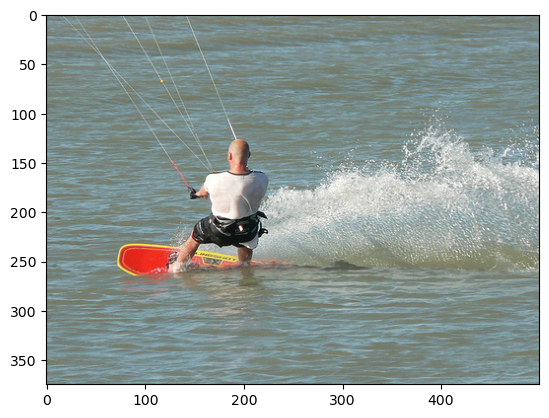

In [32]:
generate_caption("49553964_cee950f3ba.jpg")

---------------------Actual---------------------
<start> boy in yellow is riding scooter on the street <end>
<start> boy on scooter <end>
<start> boy wearing helmet rides scooter in suburban neighborhood <end>
<start> child on scooter is jumping the curb <end>
<start> young boy wearing an orange helmet riding scooter <end>
--------------------Predicted--------------------
<start> man is performing trick on his skateboard end


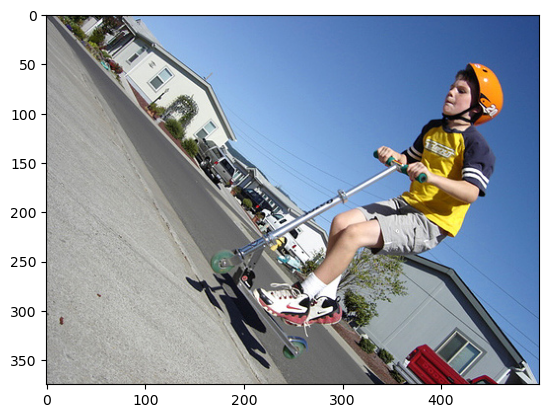

In [33]:
generate_caption("47870024_73a4481f7d.jpg")

---------------------Actual---------------------
<start> man kicks another in the shoulder at martial arts event <end>
<start> martial artists compete in match <end>
<start> men are participating in karate match <end>
<start> men in an oriental fighting contest <end>
<start> men in karate uniforms kicking each other <end>
--------------------Predicted--------------------
<start> men in karate uniforms are performing karate end


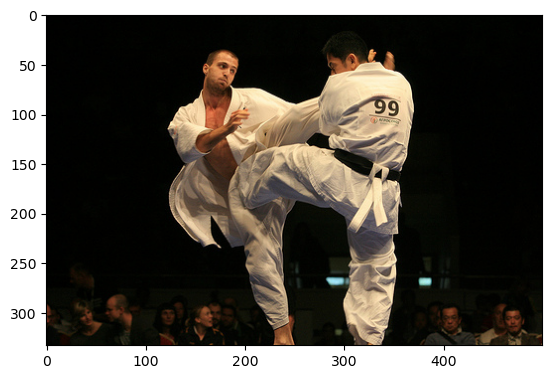

In [39]:
generate_caption('3727740053_3baa94ffcb.jpg')